In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.io import imshow
from skimage import img_as_ubyte
%matplotlib inline

ImportError: No module named 'skimage'

In [12]:
im = imread("data/O-61.jpg")

im.shape

(9999, 1274, 3)

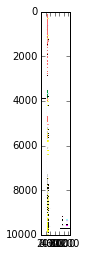

In [15]:
imshow(im)

(9999, 20, 3)

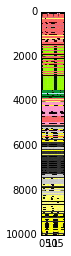

In [177]:
lith_region = im[:,240:260]

extent = [0, 200, 9999, 0]

imshow(lith_region, aspect = 0.02)
lith_region[0]
lith_region.shape

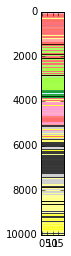

In [178]:
lith_col = np.amax(lith_region, axis = 1)
lith_cols = np.expand_dims(lith_col, axis=-1)
lith_image = np.repeat(lith_cols, 20, axis=-1)
lith_image = np.swapaxes(lith_image, 1, 2)
imshow(lith_image, aspect = 0.02)

In [179]:
# take a single color triple for each depth
lith_colour = lith_image[:,0,:]

# get a greyscale value, (average)
lith_grey = np.amin(lith_colour, axis=-1)

In [180]:
edges = (lith_grey[1:] - lith_grey[:-1])

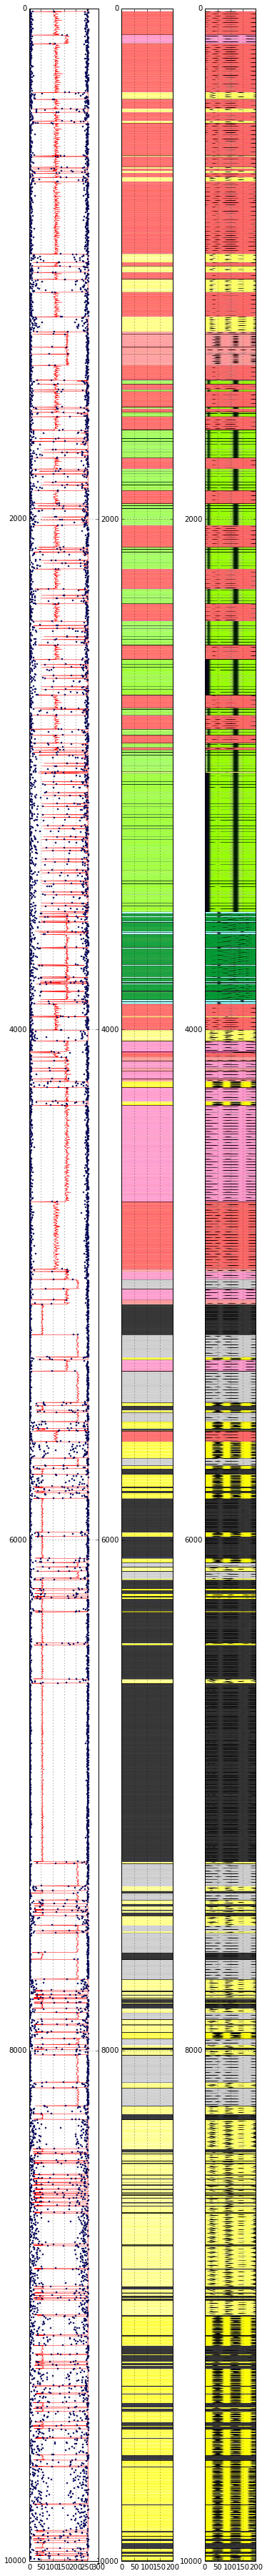

In [183]:
z = np.arange(len(lith_max))

fig = plt.figure(figsize = (8,64))  # Huge figure so we can look at it
ax = fig.add_subplot(141)
ax.plot(lith_colour[:,1], z, 'r', lw = 0.5)
ax.invert_yaxis()
ax.grid()

#ax1 = fig.add_subplot(142)
ax.plot(edges, z[:-1], 'bo', lw = 0.5, markersize = 2)
#ax.invert_yaxis()
#ax1.grid()

ax1 = fig.add_subplot(142)
ax1.imshow(lith_image, extent = extent)
ax1.grid()

ax1 = fig.add_subplot(143)
ax1.imshow(lith_region, extent = extent)
ax1.grid()